# COMS4060A - Introduction of Data Visualisation & Exploration: Assignment 1 

## Group Members
* Lisa Godiwn - 2437980
* Nihal Ranchod - 2427378
* Zach Schwark - 2434346

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

## 1.2 Numeric Fields
1. Identify what percentage of gallons, miles, and odometer entries are missing.

In [17]:
df = pd.read_csv("logbook_assignment1.csv")

df.dtypes

# Calculate the percentage of missing values in each of the specified columns
columns = ['gallons', 'miles', 'odometer']
percent_missing = df[columns].isnull().mean() * 100

# Print the results
for column, percentage in percent_missing.items():
    print(f"Percentage of missing entries in '{column}': {percentage:.2f}%")

C:\Users\lisag\AppData\Local\Temp\ipykernel_17600\1566830306.py:1: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("logbook_assignment1.csv")


Percentage of missing entries in 'gallons': 6.32%
Percentage of missing entries in 'miles': 87.55%
Percentage of missing entries in 'odometer': 12.70%


2. The miles, gallons and mpg columns are interdependent. If one is missing, the other two can be used to calculate it.

In [18]:
#convert odometer, gallons and miles to floats
df['gallons'] = df['gallons'].astype(str)
df['gallons'] = df['gallons'].str.replace(',', '').str.strip()
df['gallons'] = pd.to_numeric(df['gallons'], errors='coerce')

df['miles'] = df['miles'].astype(str)
df['miles'] = df['miles'].str.replace(',', '').str.strip()
df['miles'] = pd.to_numeric(df['miles'], errors='coerce')

df['mpg'] = df['mpg'].astype(str)
df['mpg'] = df['mpg'].str.replace(',', '').str.strip()
df['mpg'] = pd.to_numeric(df['mpg'], errors="coerce")

#display the first few rows to check the conversion
print(df[['gallons', 'miles', 'mpg']].head())

#function to calculate missing values
def fill_missing_values(row):
    if pd.isnull(row['miles']) and pd.notnull(row['gallons']) and pd.notnull(row['mpg']):
        row['miles'] = row['gallons'] * row['mpg']
    elif pd.isnull(row['gallons']) and pd.notnull(row['miles']) and pd.notnull(row['mpg']):
        row['gallons'] = row['miles'] / row['mpg']
    elif pd.isnull(row['mpg']) and pd.notnull(row['miles']) and pd.notnull(row['gallons']):
        row['mpg'] = row['miles'] / row['gallons']
    return row

# Apply the function to each row in the DataFrame
df = df.apply(fill_missing_values, axis=1)

# Display the updated DataFrame to check the changes
print(df[['miles', 'gallons', 'mpg']])

   gallons  miles   mpg
0      NaN    NaN   NaN
1   12.120    NaN  31.6
2    7.991    NaN  28.5
3   10.575    NaN  46.8
4   11.651  244.4  21.0
            miles  gallons   mpg
0             NaN      NaN   NaN
1        382.9920   12.120  31.6
2        227.7435    7.991  28.5
3        494.9100   10.575  46.8
4        244.4000   11.651  21.0
...           ...      ...   ...
1174865  335.2822   13.046  25.7
1174866  252.7400   12.637  20.0
1174867  285.0570   10.002  28.5
1174868  382.9945   10.493  36.5
1174869    0.0000   17.350   0.0

[1174870 rows x 3 columns]


3. The values will be read in as objects (or strings) by Pandas. Convert these values to float (note the point above about commas in the value).

In [21]:
print(df[['odometer', 'cost_per_gallon', 'total_spent']].head())

df['odometer'] = df['odometer'].astype(str)
df['odometer'] = df['odometer'].str.replace(',', '').str.strip()
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')

# Function to clean and convert to float
def clean_and_convert(value):
    if pd.isna(value):
        return None
    # Remove commas
    value = value.replace(',', '')
    # Remove currency symbols
    value = re.sub(r'[^\d.]', '', value)
    try:
        return float(value)
    except ValueError:
        return None

# Apply the function to create new float columns
df['cost_per_gallon_float'] = df['cost_per_gallon'].apply(clean_and_convert)
df['total_spent_float'] = df['total_spent'].apply(clean_and_convert)

df.head()

   odometer cost_per_gallon total_spent
0   73370.0             NaN         NaN
1   11983.0          $5.599      $67.86
2   98233.0           £5.45      £43.53
3  163802.0           £5.11      £54.00
4       NaN          $3.029      $35.29


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,cost_per_gallon_float,total_spent_float
0,"Cooling System, Heating System, Lights, Spark ...",Apr 7 2022,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,NaN,NaN
1,Nov 7 2012,Aug 30 2016,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,5.599,67.86
2,Sep 22 2012,Sep 28 2012,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,5.450,43.53
3,May 4 2019,May 4 2019,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,5.110,54.00
4,Feb 15 2022,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4000,https://www.somewebsite.com/honda/passport/201...,3.029,35.29


In [20]:
df.dtypes

date_fueled               object
date_captured             object
odometer                 float64
gallons                  float64
cost_per_gallon           object
total_spent               object
mpg                      float64
miles                    float64
user_url                  object
cost_per_gallon_float    float64
total_spent_float        float64
dtype: object

4. Plot the distributions and comment on the distributions.

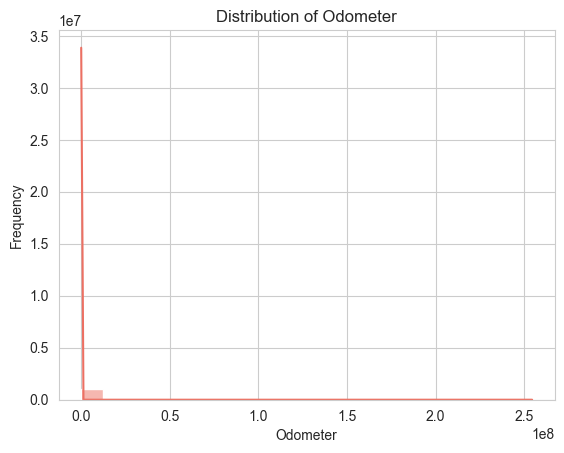

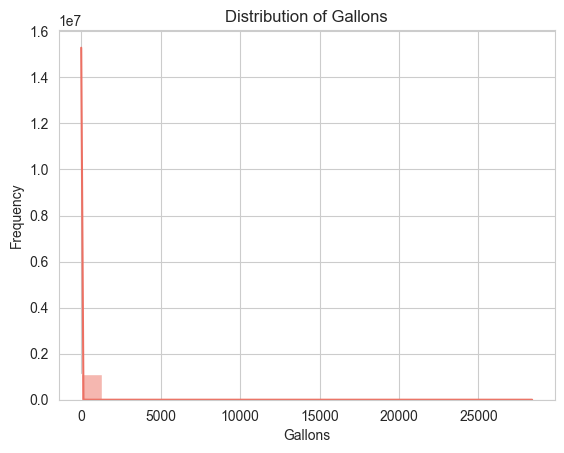

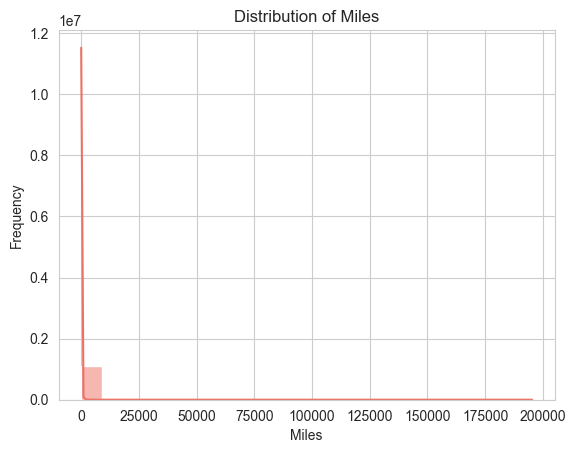

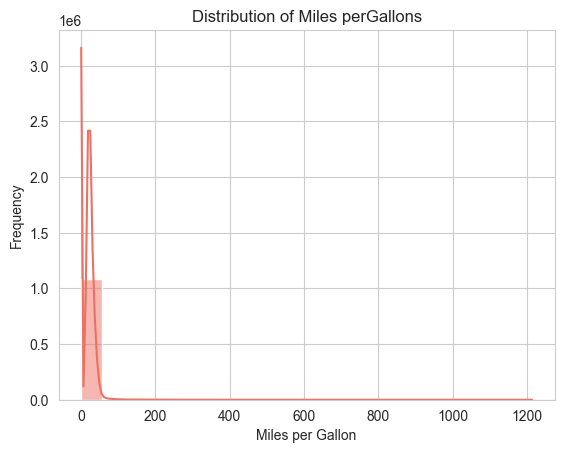

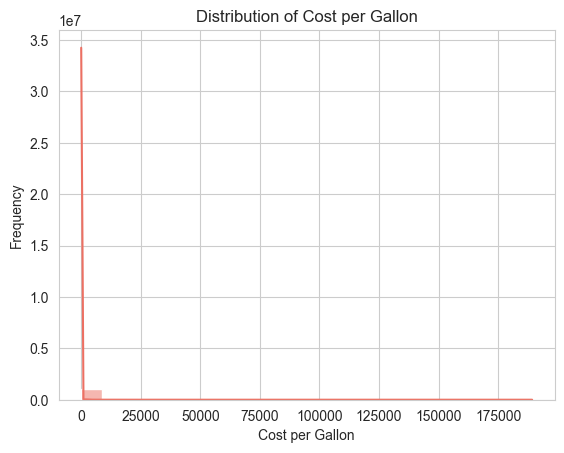

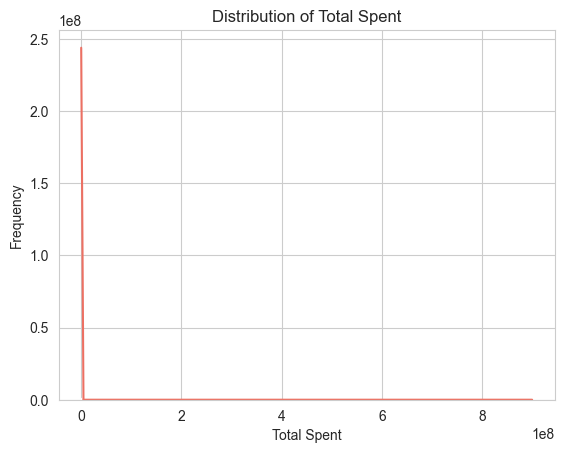

In [47]:
sns.set_style('whitegrid')
sns.histplot(df['odometer'].dropna(),
             bins='sturges',
             stat='count',
             kde=True,
             color='#ec7063')
plt.title('Distribution of Odometer')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

sns.set_style('whitegrid')
sns.histplot(df['gallons'].dropna(),
             bins='sturges',
             stat='count',
             kde=True,
             color='#ec7063')
plt.title('Distribution of Gallons')
plt.xlabel('Gallons')
plt.ylabel('Frequency')
plt.show()

sns.set_style('whitegrid')
sns.histplot(df['miles'].dropna(),
             bins='sturges',
             stat='count',
             kde=True,
             color='#ec7063')
plt.title('Distribution of Miles')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

sns.set_style('whitegrid')
sns.histplot(df['mpg'].dropna(),
             bins='sturges',
             stat='count',
             kde=True,
             color='#ec7063')
plt.title('Distribution of Miles perGallons')
plt.xlabel('Miles per Gallon')
plt.ylabel('Frequency')
plt.show()

sns.set_style('whitegrid')
sns.histplot(df['cost_per_gallon_float'].dropna(),
             bins='sturges',
             stat='count',
             kde=True,
             color='#ec7063')
plt.title('Distribution of Cost per Gallon')
plt.xlabel('Cost per Gallon')
plt.ylabel('Frequency')
plt.show()

sns.set_style('whitegrid')
sns.histplot(df['total_spent_float'].dropna(),
             bins='sturges',
             stat='count',
             kde=True,
             color='#ec7063')
plt.title('Distribution of Total Spent')
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.show()

5. Compute the statistical description of the columns: mean, standard deviation, max, min, most frequent, and quartiles. Do these results make sense?

In [48]:
df.describe()

,odometer,gallons,mpg,miles,cost_per_gallon_float,total_spent_float
count,1.025716e+06,1.100660e+06,1.100660e+06,1.100660e+06,1.092086e+06,1.098583e+06
mean,1.039960e+05,1.280107e+01,2.216332e+01,2.694896e+02,1.077037e+02,2.745571e+03
std,3.405252e+05,7.447210e+01,1.574305e+01,7.257092e+02,1.680994e+03,1.183636e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.592000e+04,8.990000e+00,1.560000e+01,1.814000e+02,2.999000e+00,3.246000e+01
50%,9.188200e+04,1.195400e+01,2.180000e+01,2.670580e+02,3.859000e+00,4.700000e+01
75%,1.469220e+05,1.493900e+01,2.850000e+01,3.427692e+02,5.300000e+00,7.078500e+01
max,2.543621e+08,2.838000e+04,1.214300e+03,1.953212e+05,1.892706e+05,8.996475e+08
